In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
Data = pd.read_csv("Fraud_Detection_Data.csv")

In [3]:
Data.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [4]:
Data

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.00,302.0,60.00,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.00,46066.0,38985.00,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.00,30355.0,14000.00,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.00,39663.0,18843.00,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.00,35586.0,29515.00,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1
...,...,...,...,...,...,...,...,...,...,...,...
1048569,20-Jan-14,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0
1048570,06-Mar-14,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0
1048571,13-Mar-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0
1048572,02-Apr-14,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0


In [5]:
Data.shape

(1048574, 11)

In [6]:
unique_Date_count = Data['Date'].nunique()
unique_Date_count

1326

In [7]:
unique_nameOrig_count = Data['nameOrig'].nunique()
unique_nameOrig_count

1048316

In [8]:
unique_city_count = Data['City'].nunique()
unique_city_count

986

In [9]:
c=Data.groupby(['City'])['nameOrig'].count().sort_values(ascending=False)
c
#sum_amount_city_wise = Data.groupby(['City'])['amount'].sum().reset_index()

City
Bengaluru, India         143733
Greater Mumbai, India    141376
Ahmedabad, India         141231
Delhi, India             140874
Hyderabad, India          31360
                          ...  
Tirur, India                 40
Mahbubnagar, India           40
Alirajpur, India             40
Varanasi, India              40
Vellore, India               40
Name: nameOrig, Length: 986, dtype: int64

In [10]:
city_value_counts = Data['City'].value_counts()
city_value_counts

Bengaluru, India         143733
Greater Mumbai, India    141376
Ahmedabad, India         141231
Delhi, India             140874
Hyderabad, India          31360
                          ...  
Mahbubnagar, India           40
Godhra, India                40
Rayagada, India              40
Changanassery, India         40
Fazilka, India               40
Name: City, Length: 986, dtype: int64

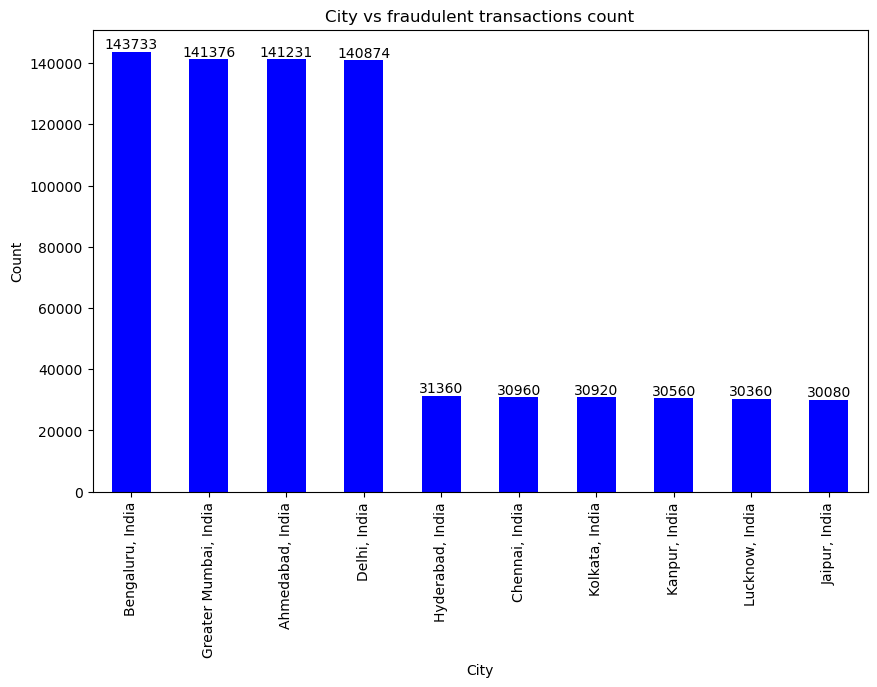

In [43]:
plt.figure(figsize=(10, 6))
city_value_counts.head(10).plot(kind='bar', color='Blue')
plt.title('City vs fraudulent transactions count')
plt.xlabel('City')
plt.ylabel('Count')
for index, value in enumerate(city_value_counts.head(10)):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [12]:
unique_Type_count = Data['type'].nunique()
unique_Type_count

5

In [13]:
type_value_counts = Data['type'].value_counts()
type_value_counts

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86752
DEBIT         7178
Name: type, dtype: int64

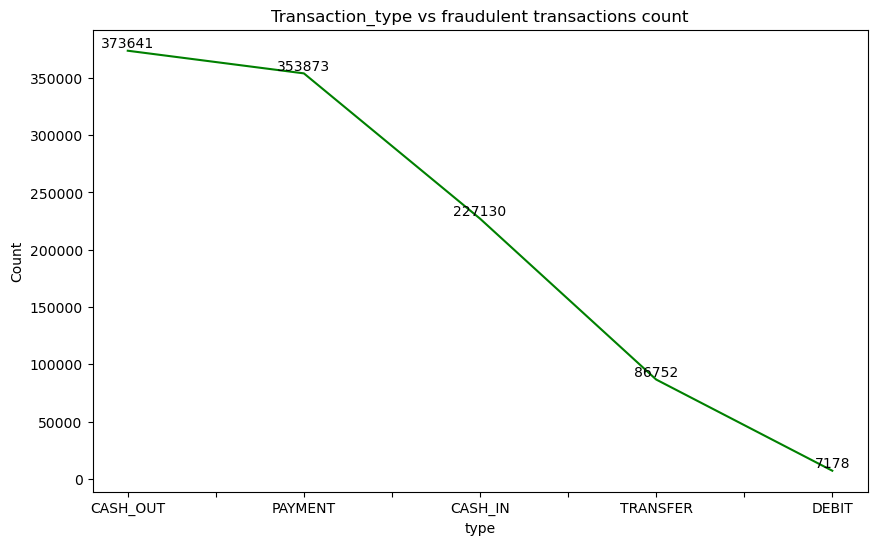

In [44]:
plt.figure(figsize=(10, 6))
type_value_counts.plot(kind='line', color='Green')
plt.title('Transaction_type vs fraudulent transactions count')
plt.xlabel('type')
plt.ylabel('Count')
for index, value in enumerate(type_value_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [15]:
unique_CardType_count = Data['Card Type'].nunique()
unique_CardType_count

6

In [16]:
CardType_value_counts = Data['Card Type'].value_counts()
CardType_value_counts

Silver       275540
Signature    259327
Platinum     257374
Gold         256173
Classic          80
Mass             80
Name: Card Type, dtype: int64

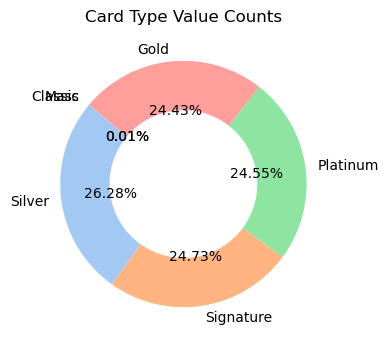

In [17]:
plt.figure(figsize=(4,4))
colors=sns.color_palette('pastel', len(CardType_value_counts))
plt.pie(CardType_value_counts, labels=CardType_value_counts.index,  
        autopct='%1.2f%%', startangle=140,colors=colors, wedgeprops=dict(width=0.4))
plt.title('Card Type Value Counts')

plt.show()

In [18]:
Gender_valuecounts=Data['Gender'].value_counts()
Gender_valuecounts

F    551182
M    497392
Name: Gender, dtype: int64

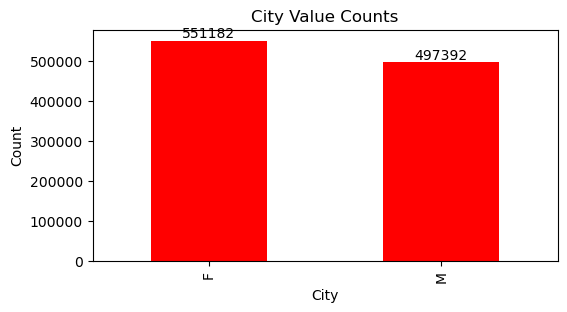

In [19]:
plt.figure(figsize=(6,3))
Gender_valuecounts.plot(kind='bar', color='Red')
plt.title('City Value Counts')
plt.xlabel('City')
plt.ylabel('Count')
for index, value in enumerate(Gender_valuecounts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [20]:
fraud_counts = Data['isFraud'].value_counts()
fraud_counts
Fraud_Tranasctions = fraud_counts.get(1, 0)
Successful_Tranasctions = fraud_counts.get(0, 0)
print(Fraud_Tranasctions) 
print(Successful_Tranasctions)

175785
872789


In [21]:
Fraud_Transactions_percentage=((Fraud_Tranasctions/unique_nameOrig_count)*100).round(3)
print("%Fraud_Transactions:",Fraud_Transactions_percentage,"%")

%Fraud_Transactions: 16.768 %


In [22]:
fraud_percentage_by_city = Data.groupby('City')['isFraud'].mean() * 100
fraud_percentage_by_city.round(2).sort_values(ascending=False)

City
Godhra, India            27.50
Azamgarh, India          26.25
Thodupuzha, India        25.00
Ajmer, India             25.00
Tirupathur, India        25.00
                         ...  
Sathyamangalam, India     9.17
Jaggaiahpet, India        9.17
Narkatiaganj, India       9.17
Agra, India               8.75
Varanasi, India           7.50
Name: isFraud, Length: 986, dtype: float64

In [23]:
fraud_percentage_by_type = Data.groupby('type')['isFraud'].mean() * 100
fraud_percentage_by_type.round(2).sort_values(ascending=False)

type
TRANSFER    67.75
CASH_OUT    24.38
CASH_IN      9.16
DEBIT        4.22
PAYMENT      1.36
Name: isFraud, dtype: float64

In [24]:
fraud_percentage_by_expense_type = Data.groupby('Exp Type')['isFraud'].mean() * 100
fraud_percentage_by_expense_type.round(2).sort_values(ascending=False)

Exp Type
Personal_Care     22.50
Fuel              16.99
Bills             16.85
Food              16.78
Grocery           16.66
Entertainment     16.63
Travel            16.03
Health_Fitness    15.00
Home              10.00
Name: isFraud, dtype: float64

In [25]:
fraud_percentage_by_gender = Data.groupby('Gender')['isFraud'].mean() * 100
fraud_percentage_by_gender.round(2).sort_values(ascending=False)

Gender
F    16.78
M    16.74
Name: isFraud, dtype: float64

In [26]:
fraud_percentage_by_card_type = Data.groupby('Card Type')['isFraud'].mean() * 100
fraud_percentage_by_card_type.round(2).sort_values(ascending=False)

Card Type
Silver       16.93
Signature    16.76
Gold         16.70
Platinum     16.66
Classic      16.25
Mass         13.75
Name: isFraud, dtype: float64

In [27]:
sum_amount_city_wise = Data.groupby(['City'])['amount'].sum().reset_index()
sum_amount_city_wise

,City,amount
0,"Achalpur, India",14936574.87
1,"Adilabad, India",15778898.45
2,"Adityapur, India",9607248.61
3,"Adoni, India",13217139.51
4,"Adoor, India",14283816.13
...,...,...
981,"Zaidpur, India",6014252.66
982,"Zamania, India",9456545.68
983,"Zira, India",18335934.75
984,"Zirakpur, India",5730192.13


In [28]:
city_wise_summary = Data.groupby('City').agg(
    TotalAmount=('amount', 'sum'),
    FraudAmount=('amount', lambda x: x[Data['isFraud']==1].sum()),
    SuccessfulAmount=('amount', lambda x: x[Data['isFraud']==0].sum())
)
city_wise_summary['%FraudTransaction_amount'] = (city_wise_summary['FraudAmount'] / city_wise_summary['TotalAmount']) * 100
city_wise_summary['%SuccessfulTransaction_amount'] = (city_wise_summary['SuccessfulAmount'] / city_wise_summary['TotalAmount']) * 100
city_wise_summary.sort_values(by='%SuccessfulTransaction_amount',ascending=False)


,TotalAmount,FraudAmount,SuccessfulAmount,%FraudTransaction_amount,%SuccessfulTransaction_amount
City,,,,,
"Wankaner, India",3993832.19,79337.27,3914494.92,1.986495,98.013505
"Narkatiaganj, India",3926217.46,87108.00,3839109.46,2.218624,97.781376
"Nakodar, India",4304908.60,107559.00,4197349.60,2.498520,97.501480
"Sheopur, India",10046942.27,258193.85,9788748.42,2.569875,97.430125
"Simdega, India",12581371.99,326422.00,12254949.99,2.594487,97.405513
...,...,...,...,...,...
"Manavadar, India",10380564.16,6597797.03,3782767.13,63.559137,36.440863
"Patan, India",12380715.93,8070341.35,4310374.58,65.184771,34.815229
"Phusro, India",11489501.38,7917225.56,3572275.82,68.908348,31.091652


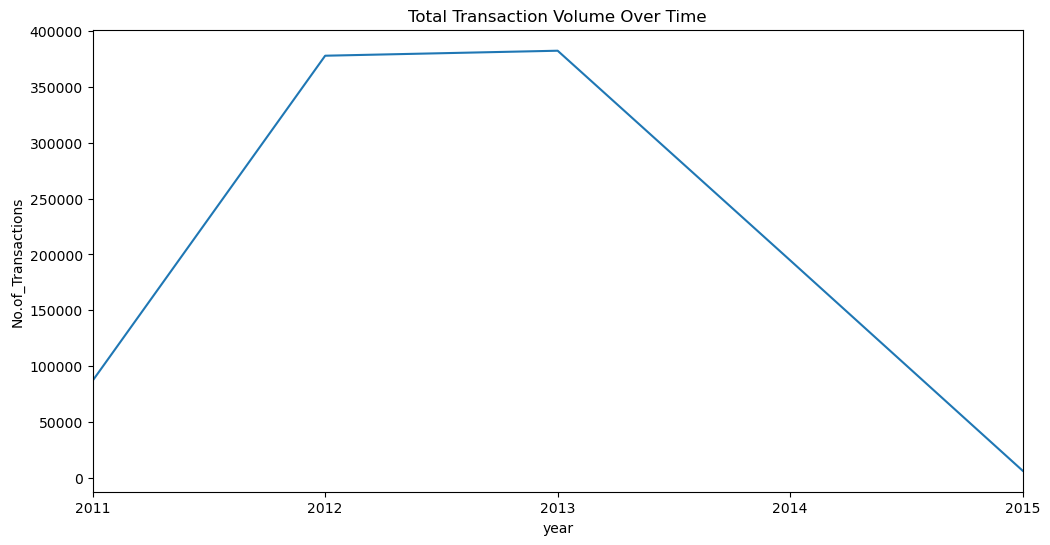

In [33]:
Data['Date'] = pd.to_datetime(Data['Date'])
transaction_volume_over_time = Data.groupby(Data['Date'].dt.to_period("Y")).size()
transaction_volume_over_time.plot(kind='line', figsize=(12, 6), title='Total Transaction Volume Over Time')
plt.xlabel('year')
plt.ylabel('No.of_Transactions')

plt.show()

i. Percentage of Fraudulent Transactions: 16.76%


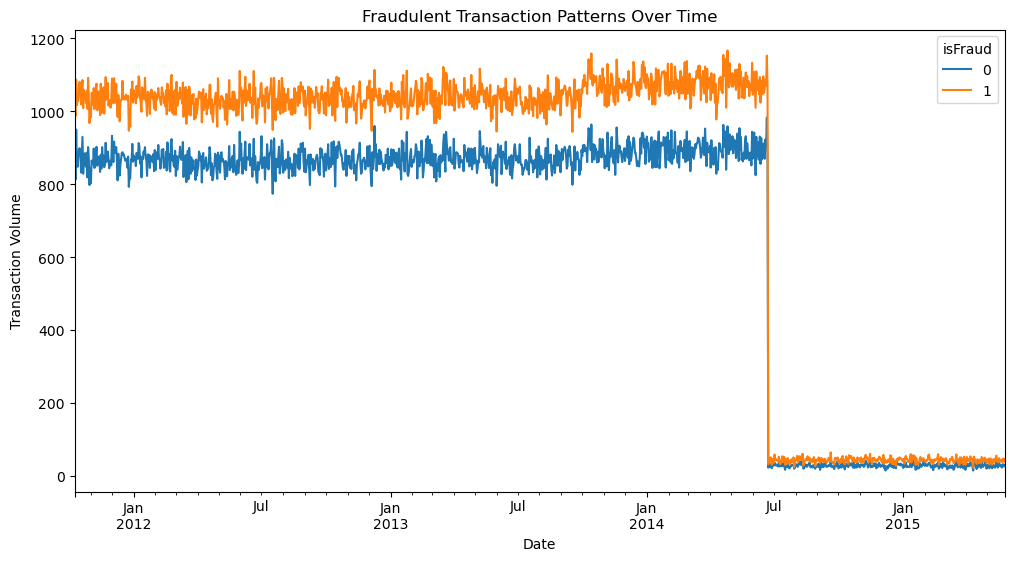

In [38]:

percentage_fraudulent_transactions = (Data['isFraud'].sum() / len(Data)) * 100
print(f'i. Percentage of Fraudulent Transactions: {percentage_fraudulent_transactions:.2f}%')

## ii. Identified patterns or trends in the occurrence of fraudulent transactions?
fraud_patterns = Data.groupby(['Date', 'isFraud']).size().unstack()
fraud_patterns.plot(kind='line', figsize=(12, 6), stacked=True, title='Fraudulent Transaction Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.show()

i. Cities with a Higher Incidence of Fraud:
Bengaluru, India         24588
Greater Mumbai, India    24033
Ahmedabad, India         23962
Delhi, India             23923
Hyderabad, India          4988
                         ...  
Changanassery, India         6
Bagaha, India                6
Fazilka, India               6
Tirur, India                 5
Varanasi, India              3
Name: City, Length: 986, dtype: int64


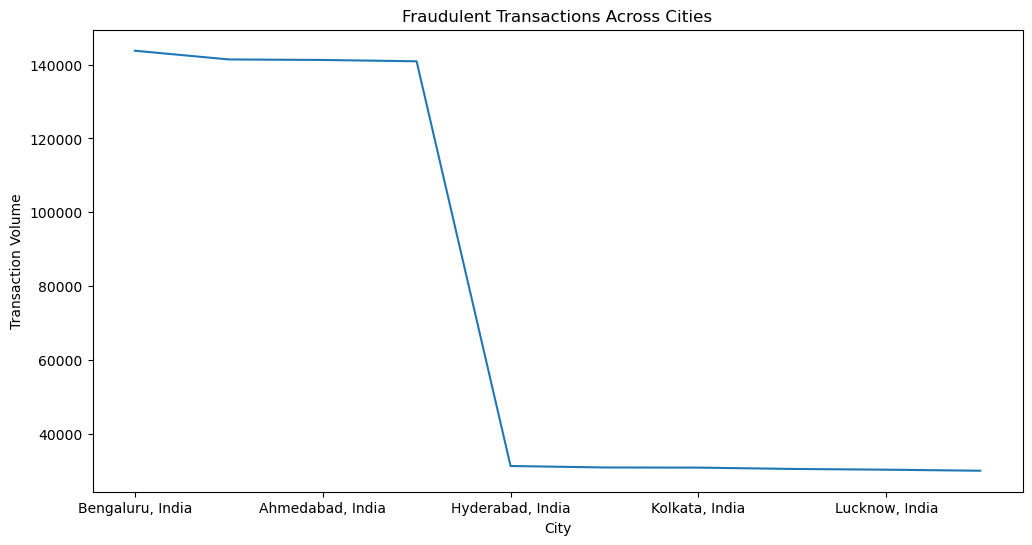

In [47]:

cities_with_high_fraud = Data[Data['isFraud'] == 1]['City'].value_counts()
print(f'i. Cities with a Higher Incidence of Fraud:\n{cities_with_high_fraud}')

city_wise_fraudulent_transactions = Data['City'].value_counts()
city_wise_fraudulent_transactions.head(10).plot(kind='line', figsize=(12, 6), title='Fraudulent Transactions Across Cities')
plt.xlabel('City')
plt.ylabel('Transaction Volume')
plt.show()
